In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import re

In [ ]:
books = pd.read_csv('Books.csv')
Users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

## Pre-Processing of given Datasets

## Books Dataset

In [ ]:
books.shape

(271360, 8)

In [ ]:
print(list(books.columns))

['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [ ]:
# some of the year of publication is replaced by names.

books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
# Handling non_numeric values
# Using errors=’coerce’. It will replace all non-numeric values with NaN

books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors = 'coerce')

In [ ]:
print(sorted(books['Year-Of-Publication'].unique()))

[0.0, 1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2008.0, 2010.0, 2011.0, 2012.0, 2020.0, 2021.0, 2024.0, 2026.0, 2030.0, 2037.0, 2038.0, 2050.0, nan]


In [ ]:
# Filtering invalid year of publications

books.loc[(books['Year-Of-Publication'] > 2021) | (books['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.NAN

In [ ]:
# Filling NAN values with mean.

books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()), inplace = True)

In [ ]:
# Converting dtypes of values into int32

books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(np.int32)

In [ ]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902,
       1924, 1921, 1900, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 1806,
       2021, 2012, 2006, 1909, 2008, 1378, 1919, 1922, 1897, 1376])

## User Dataset

In [ ]:
Users.shape

(278858, 3)

In [ ]:
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
Users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [ ]:
# age ranges from 0 to 244 for user.

print(sorted(Users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [ ]:
# Filtering the age of user

Users.loc[(Users['Age'] > 95) | (Users['Age'] < 5), 'Age'] = np.NAN

In [ ]:
# Filling NAN values with mean.

Users['Age'] = Users['Age'].fillna(Users['Age'].mean())

In [ ]:
# Converting dtypes of values into int32

Users['Age'] = Users['Age'].astype(np.int32)

In [ ]:
print(sorted(Users['Age'].unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]


## Ratings Dataset

In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
sorted(ratings['Book-Rating'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

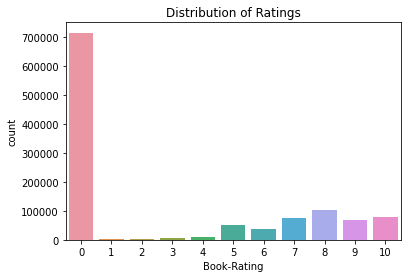

In [ ]:
# visualizing the distributions of ratings

df = pd.DataFrame(ratings['Book-Rating'])

sns.countplot(data = df, x = 'Book-Rating' )
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
# creating a new dataframe by combining ratings and books dataframe by 'ISBN'

new_ratings = ratings[ratings['ISBN'].isin(books['ISBN'])]

In [ ]:
new_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
new_ratings.shape

(1031136, 3)

In [ ]:
# Creating a valid ratings dataframe

valid_ratings = new_ratings[new_ratings['Book-Rating'] != 0]

In [ ]:
# creating a new dataframe by combining users and valid_ratings dataframe by 'user-id'

user_ratings = Users[Users['User-ID'].isin(valid_ratings['User-ID'])]

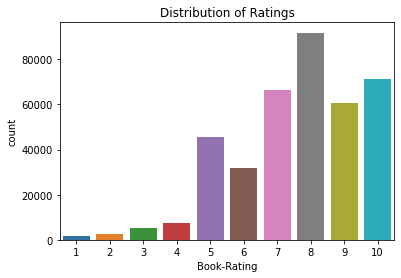

In [ ]:
# Visualzing valid ratings i.e except zero rating

sns.countplot(data = valid_ratings, x = 'Book-Rating' )
plt.title('Distribution of Ratings')
plt.show()

## Collaborative Filtering by K - Nearest Neighbours

kNN is a machine learning algorithm used to find clusters of similar kind based on similar book ratings and make predictions using the average rating of top-k nearest neighbors.

In [ ]:
# Creating dataframe by merging ratings, books dataframe by 'ISBN'

book_rating = pd.merge(ratings, books, on = 'ISBN')
dropping_columns = ['Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
book_rating = book_rating.drop(dropping_columns, axis = 1)

# Keeping columns 'user-id','ISBN', 'Book-Rating', 'Book-Title' 

In [ ]:
book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [ ]:
# Dropping rows with null values

book_rating = book_rating.dropna(axis = 0, subset = ['Book-Title'])

In [ ]:
# Creating a new column 'Total Rating Count' by grouping by book titles and ratings

book_rating_count = (book_rating.groupby(by = ['Book-Title'])['Book-Rating'].count().
                     reset_index().rename(columns = {'Book-Rating' : 'Total_Rating_Count'})
                     [['Book-Title','Total_Rating_Count']]
                    )

In [ ]:
book_rating_count.head()

,Book-Title,Total_Rating_Count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [ ]:
# merging 'book-rating' & 'book-rating-count' dataframe for considering only popular books

modified_data = book_rating.merge(book_rating_count, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left' )

In [ ]:
modified_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total_Rating_Count
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [ ]:
# considering books having minimum total ratings above 100

threshold = 100
popular_books = modified_data.query('Total_Rating_Count >= @threshold')

In [ ]:
popular_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total_Rating_Count
62,276727,0446520802,0,The Notebook,650
63,278418,0446520802,0,The Notebook,650
64,638,0446520802,0,The Notebook,650
65,3363,0446520802,0,The Notebook,650
66,7158,0446520802,10,The Notebook,650


In [ ]:
popular_books.shape

(183799, 5)

In [ ]:
# looking for uniques locations in dataset

l = list(user_ratings['Location'].unique())

In [ ]:
# l

## Filtering for users in India, USA

For reduced set of data due to processing limitations

In [ ]:
# merging 'popular-books' dataframe with 'users' dataframe for getting locations of users.

combined = popular_books.merge(Users, left_on = 'User-ID', right_on = 'User-ID', how = 'left')
combined

,User-ID,ISBN,Book-Rating,Book-Title,Total_Rating_Count,Location,Age
0,276727,0446520802,0,The Notebook,650,"h, new south wales, australia",16
1,278418,0446520802,0,The Notebook,650,"omaha, nebraska, usa",34
2,638,0446520802,0,The Notebook,650,"san diego, california, usa",20
3,3363,0446520802,0,The Notebook,650,"knoxville, tennessee, usa",29
4,7158,0446520802,10,The Notebook,650,"omaha, nebraska, usa",30
...,...,...,...,...,...,...,...
183794,271503,0394512731,0,The Heart of a Woman,108,"wichita, kansas, usa",34
183795,271705,B0001PIOX4,0,Fahrenheit 451,409,"atlanta, georgia, usa",25
183796,274808,0449701913,0,Homecoming,137,"paynesville, , usa",17
183797,275970,0865714215,0,Stormy Weather,103,"pittsburgh, pennsylvania, usa",46


In [ ]:
# using regular expression for matching string with India and USA.

Ind_usa_rating = combined[combined['Location'].str.contains('india|usa')]

Ind_usa_rating = Ind_usa_rating.drop('Age', axis = 1)
Ind_usa_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total_Rating_Count,Location
1,278418,0446520802,0,The Notebook,650,"omaha, nebraska, usa"
2,638,0446520802,0,The Notebook,650,"san diego, california, usa"
3,3363,0446520802,0,The Notebook,650,"knoxville, tennessee, usa"
4,7158,0446520802,10,The Notebook,650,"omaha, nebraska, usa"
5,8253,0446520802,10,The Notebook,650,"tulsa, oklahoma, usa"


In [ ]:
from scipy.sparse import csr_matrix

Ind_usa_rating = Ind_usa_rating.drop_duplicates(['User-ID','Book-Title'])

# creating a pivot table based on 'book-title' and 'user-id' having 'ratings' as values.

Ind_usa_rating_pivot = Ind_usa_rating.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
Ind_usa_rating_pivot.head(6)


User-ID,9,14,16,17,26,32,39,42,44,51,...,278813,278819,278820,278824,278828,278832,278836,278843,278844,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# calculating the sparsity

user = Ind_usa_rating_pivot.shape[1]
book = Ind_usa_rating_pivot.shape[0]

print(user, book)

28295 914


In [ ]:
# this shows that 99.38 % values are empty.

sparsity = 1.0 - len(valid_ratings)/float(user_ratings.shape[0]*book)
sparsity

0.9938323945233928

In [ ]:
# Creating matrix from pivot table. 
# Ratings are in a matrix form having one row for each book and one column for each user.
# most of the values are zeros.

Ind_usa_rating_matrix = csr_matrix(Ind_usa_rating_pivot.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors

# using 'cosine' metric for similarity constraint and 'brute' algorithm

model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')

# fitting the matrix into knn model
model.fit(Ind_usa_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# Randomly selecting a book based on index number.

book_name = np.random.choice(Ind_usa_rating_pivot.shape[0])
print(book_name)

# By using index number finding 10 nearest neighbors using kNN model.

dist, indices = model.kneighbors(Ind_usa_rating_pivot.iloc[book_name,:].values.reshape(1, -1), n_neighbors = 11)

print(dist)
print(indices)

297
[[0.         0.82916879 0.90042299 0.91120066 0.92047496 0.92673294
  0.93236157 0.94096771 0.94236135 0.94422555 0.94453555]]
[[297  41 383 307 112  42 705 898 849 839 693]]


In [ ]:
# name of the book

Ind_usa_rating_pivot.index[book_name]

'High Fidelity'

In [ ]:
# loop for printing recommended book names along with the distance with selected book.
# lesser the distance , more the similarity between books based on ratings.
listofbooks1 = []
listofdistance1 = []

for i in range(0, len(dist.flatten())):
    if i == 0:
        print(f'Recommendations for {Ind_usa_rating_pivot.index[book_name]}:','\n')
    else:
        print(f'{i}: {Ind_usa_rating_pivot.index[indices.flatten()[i]]}, with distance of {dist.flatten()[i]}:')
        
        listofbooks1.append(Ind_usa_rating_pivot.index[indices.flatten()[i]])
        listofdistance1.append(dist.flatten()[i])

Recommendations for High Fidelity: 

1: About a Boy, with distance of 0.829168788495385:
2: Me Talk Pretty One Day, with distance of 0.9004229850377345:
3: How to Be Good, with distance of 0.9112006562437959:
4: Bridget Jones's Diary, with distance of 0.9204749564360789:
5: About a Boy (Movie Tie-In), with distance of 0.9267329446200454:
6: The House on Mango Street (Vintage Contemporaries), with distance of 0.9323615707571746:
7: Wicked: The Life and Times of the Wicked Witch of the West, with distance of 0.9409677066160648:
8: To Kill a Mockingbird, with distance of 0.9423613469485703:
9: The World According to Garp, with distance of 0.9442255536862033:
10: The Handmaid's Tale, with distance of 0.9445355465071719:


In [ ]:
dataf1 = {'Books': listofbooks1, 'Distances': listofdistance1}
db1 = pd.DataFrame(dataf1, index = [i for i in range(1,11)])
db1

,Books,Distances
1,About a Boy,0.829169
2,Me Talk Pretty One Day,0.900423
3,How to Be Good,0.911201
4,Bridget Jones's Diary,0.920475
5,About a Boy (Movie Tie-In),0.926733
6,The House on Mango Street (Vintage Contemporar...,0.932362
7,Wicked: The Life and Times of the Wicked Witch...,0.940968
8,To Kill a Mockingbird,0.942361
9,The World According to Garp,0.944226
10,The Handmaid's Tale,0.944536


## Improvement in model

In [ ]:
# Selecting the users based on there countries
Users[['city','state','country','nan','nan','nan','nan','nan','nan']]=Users['Location'].apply(lambda x: pd.Series(str(x).split(",")))
Users.drop(['Location','nan'],axis=1)
Users_defined = Users
Users_defined

,User-ID,Location,Age,city,state,country,nan
0,1,"nyc, new york, usa",34,nyc,new york,usa,NaN
1,2,"stockton, california, usa",18,stockton,california,usa,NaN
2,3,"moscow, yukon territory, russia",34,moscow,yukon territory,russia,NaN
3,4,"porto, v.n.gaia, portugal",17,porto,v.n.gaia,portugal,NaN
4,5,"farnborough, hants, united kingdom",34,farnborough,hants,united kingdom,NaN
...,...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",34,portland,oregon,usa,NaN
278854,278855,"tacoma, washington, united kingdom",50,tacoma,washington,united kingdom,NaN
278855,278856,"brampton, ontario, canada",34,brampton,ontario,canada,NaN
278856,278857,"knoxville, tennessee, usa",34,knoxville,tennessee,usa,NaN


In [ ]:
my_dict=(Users_defined['country'].value_counts()).to_dict()

count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
f

,c,count
0,usa,139187
1,canada,21558
2,united kingdom,18286
3,germany,17022
4,spain,13095
5,australia,11723
6,italy,11242
7,,4598
8,france,3442
9,portugal,3306


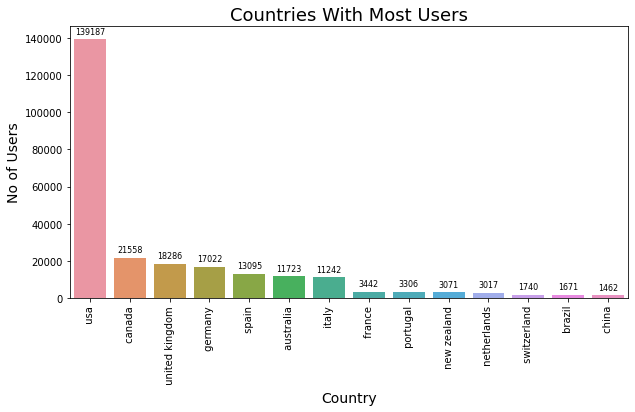

In [ ]:
f.drop(7,inplace=True)
fig=plt.figure(figsize=(10,5))
ax = sns.barplot(y = 'count',x= 'c' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 
plt.xlabel("Country", size=14)
plt.ylabel("No of Users", size=14)
plt.title("Countries With Most Users", size=18)
plt.show()

In [ ]:
# merging 'popular-books' dataframe with 'users' dataframe for getting locations of users.

combined = popular_books.merge(Users, left_on = 'User-ID', right_on = 'User-ID', how = 'left')

In [ ]:
# using regular expression for matching string with India and USA.

country_rating = combined[combined['Location'].str.contains('usa|canada|united kingdom|germany|spain|austrailia|italy')]

country_rating = country_rating.drop('Age', axis = 1)
country_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total_Rating_Count,Location,city,state,country,nan
1,278418,0446520802,0,The Notebook,650,"omaha, nebraska, usa",omaha,nebraska,usa,NaN
2,638,0446520802,0,The Notebook,650,"san diego, california, usa",san diego,california,usa,NaN
3,3363,0446520802,0,The Notebook,650,"knoxville, tennessee, usa",knoxville,tennessee,usa,NaN
4,7158,0446520802,10,The Notebook,650,"omaha, nebraska, usa",omaha,nebraska,usa,NaN
5,8253,0446520802,10,The Notebook,650,"tulsa, oklahoma, usa",tulsa,oklahoma,usa,NaN


In [ ]:
from scipy.sparse import csr_matrix

country_rating = country_rating.drop_duplicates(['User-ID','Book-Title'])

# creating a pivot table based on 'book-title' and 'user-id' having 'ratings' as values.

country_rating_pivot = country_rating.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
country_rating_pivot.head(6)

User-ID,8,9,14,16,17,26,32,39,42,44,...,278819,278820,278824,278828,278832,278836,278843,278844,278846,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user = country_rating_pivot.shape[1]
book = country_rating_pivot.shape[0]

print(user, book)

34266 914


In [ ]:
# Creating matrix from pivot table. 
# Ratings are in a matrix form having one row for each book and one column for each user.
# most of the values are zeros.

country_rating_matrix = csr_matrix(country_rating_pivot.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors

# using 'cosine' metric for similarity constraint and 'brute' algorithm

model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')

# fitting the matrix into knn model
model.fit(country_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# Randomly selecting a book based on index number.

# book_name = np.random.choice(country_rating_pivot.shape[0])
print(book_name)

# By using index number finding 10 nearest neighbors using kNN model.

dist, indices = model.kneighbors(country_rating_pivot.iloc[book_name,:].values.reshape(1, -1), n_neighbors = 11)

print(dist)
print(indices)

297
[[4.44089210e-16 8.05322233e-01 8.73990679e-01 9.15563348e-01
  9.19395547e-01 9.19594378e-01 9.27858828e-01 9.28534418e-01
  9.32166968e-01 9.32500287e-01 9.33104019e-01]]
[[297  41 307 383 433  42 479 605 839 849 416]]


In [ ]:
# name of the book

country_rating_pivot.index[book_name]

'High Fidelity'

In [ ]:
# loop for printing recommended book names along with the distance with selected book.
# lesser the distance , more the similarity between books based on ratings.
listofbooks2 = []
listofdistance2 = []

for i in range(0, len(dist.flatten())):
    if i == 0:
        print(f'Recommendations for {country_rating_pivot.index[book_name]}:','\n')
    else:
        print(f'{i}: {country_rating_pivot.index[indices.flatten()[i]]}, with distance of {dist.flatten()[i]}:')
        
        listofbooks2.append(country_rating_pivot.index[indices.flatten()[i]])
        listofdistance2.append(dist.flatten()[i])
        

Recommendations for High Fidelity: 

1: About a Boy, with distance of 0.8053222326595483:
2: How to Be Good, with distance of 0.8739906794392742:
3: Me Talk Pretty One Day, with distance of 0.915563347589336:
4: Notes from a Small Island, with distance of 0.9193955465354122:
5: About a Boy (Movie Tie-In), with distance of 0.9195943775285194:
6: Primary Colors: A Novel of Politics, with distance of 0.9278588278701534:
7: The Beach, with distance of 0.9285344177668884:
8: The World According to Garp, with distance of 0.9321669677950747:
9: To Kill a Mockingbird, with distance of 0.9325002866058714:
10: Naked, with distance of 0.9331040185186043:


In [ ]:
dataf2 = {'Books': listofbooks2, 'Distances': listofdistance2}
db2 = pd.DataFrame(dataf2, index = [i for i in range(1,11)])
db2
# improved suggestions

,Books,Distances
1,About a Boy,0.805322
2,How to Be Good,0.873991
3,Me Talk Pretty One Day,0.915563
4,Notes from a Small Island,0.919396
5,About a Boy (Movie Tie-In),0.919594
6,Primary Colors: A Novel of Politics,0.927859
7,The Beach,0.928534
8,The World According to Garp,0.932167
9,To Kill a Mockingbird,0.932500
10,Naked,0.933104


In [ ]:
# previous suggestions
db1

,Books,Distances
1,About a Boy,0.829169
2,Me Talk Pretty One Day,0.900423
3,How to Be Good,0.911201
4,Bridget Jones's Diary,0.920475
5,About a Boy (Movie Tie-In),0.926733
6,The House on Mango Street (Vintage Contemporar...,0.932362
7,Wicked: The Life and Times of the Wicked Witch...,0.940968
8,To Kill a Mockingbird,0.942361
9,The World According to Garp,0.944226
10,The Handmaid's Tale,0.944536


## Popularity based (Top In a given place)


In [ ]:
dataset = pd.merge(books, ratings, on='ISBN', how='inner')
dataset = pd.merge(dataset, Users_defined, on='User-ID', how='inner')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031136 non-null  object
 1   Book-Title           1031136 non-null  object
 2   Book-Author          1031135 non-null  object
 3   Year-Of-Publication  1031136 non-null  int32 
 4   Publisher            1031134 non-null  object
 5   Image-URL-S          1031136 non-null  object
 6   Image-URL-M          1031136 non-null  object
 7   Image-URL-L          1031132 non-null  object
 8   User-ID              1031136 non-null  int64 
 9   Book-Rating          1031136 non-null  int64 
 10  Location             1031136 non-null  object
 11  Age                  1031136 non-null  int32 
 12  city                 1031136 non-null  object
 13  state                1031136 non-null  object
 14  country              1031136 non-null  object
 15  nan            

In [ ]:
## Explicit Ratings Dataset
df1 = dataset[dataset['Book-Rating'] != 0]
df1 = df1.reset_index(drop = True)
df1.shape

(383842, 16)

In [ ]:
df1.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,city,state,country,nan
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",34,timmins,ontario,canada,NaN
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5,"timmins, ontario, canada",34,timmins,ontario,canada,NaN
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,8,5,"timmins, ontario, canada",34,timmins,ontario,canada,NaN
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,8,5,"timmins, ontario, canada",34,timmins,ontario,canada,NaN
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,8,6,"timmins, ontario, canada",34,timmins,ontario,canada,NaN


In [ ]:
## Implicit Ratings Dataset
df2 = dataset[dataset['Book-Rating'] == 0]
df2 = df2.reset_index(drop = True)
df2.shape

(647294, 16)

In [ ]:
def unique_places(dataframe, place):
    place = place.lower()

    if place in list(dataframe['city'].unique()):
        return dataframe[dataframe['city'] == place]
    elif place in list(dataframe['state'].unique()):
        return dataframe[dataframe['state'] == place]
    elif place in list(dataframe['country'].unique()):
        return dataframe[dataframe['country'] == place]
    else:
        return "Invalid Entry"

In [ ]:
place = input("Enter the name of place: ")
data = unique_places(df1, place)
data 

Enter the name of place: hyderabad


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,city,state,country,nan
332395,0439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,263793,10,"hyderabad, andhra pradesh, india",14,hyderabad,andhra pradesh,india,NaN
332396,0440431808,From the Mixed-Up Files of Mrs. Basil E. Frank...,E. L. Konigsburg,1977,Yearling Books,http://images.amazon.com/images/P/0440431808.0...,http://images.amazon.com/images/P/0440431808.0...,http://images.amazon.com/images/P/0440431808.0...,263793,10,"hyderabad, andhra pradesh, india",14,hyderabad,andhra pradesh,india,NaN
332397,0553212494,Treasure Island (Bantam Classic),ROBERT LOUIS STEVENSON,1982,Bantam,http://images.amazon.com/images/P/0553212494.0...,http://images.amazon.com/images/P/0553212494.0...,http://images.amazon.com/images/P/0553212494.0...,263793,10,"hyderabad, andhra pradesh, india",14,hyderabad,andhra pradesh,india,NaN
332398,0140025324,Service with a smile,P. G Wodehouse,1975,Penguin,http://images.amazon.com/images/P/0140025324.0...,http://images.amazon.com/images/P/0140025324.0...,http://images.amazon.com/images/P/0140025324.0...,263793,9,"hyderabad, andhra pradesh, india",14,hyderabad,andhra pradesh,india,NaN
332399,0140025707,Galahad at Blandings,P. G. Wodehouse,1995,Penguin Books,http://images.amazon.com/images/P/0140025707.0...,http://images.amazon.com/images/P/0140025707.0...,http://images.amazon.com/images/P/0140025707.0...,263793,8,"hyderabad, andhra pradesh, india",14,hyderabad,andhra pradesh,india,NaN
332400,0006944035,Secret Island / Secret Mountain (Two-in-ones),Enid Blyton,1994,HarperCollins Publishers,http://images.amazon.com/images/P/0006944035.0...,http://images.amazon.com/images/P/0006944035.0...,http://images.amazon.com/images/P/0006944035.0...,263793,10,"hyderabad, andhra pradesh, india",14,hyderabad,andhra pradesh,india,NaN
332401,0521397928,New Horizons - Science 5-16 (New Horizons Scie...,New Horizons Science,1995,Cambridge University Press,http://images.amazon.com/images/P/0521397928.0...,http://images.amazon.com/images/P/0521397928.0...,http://images.amazon.com/images/P/0521397928.0...,263793,10,"hyderabad, andhra pradesh, india",14,hyderabad,andhra pradesh,india,NaN
332402,0671505173,CROSS COUNTRY CRIME (HARDY BOYS 134) : CROSS C...,Franklin W. Dixon,1995,Aladdin,http://images.amazon.com/images/P/0671505173.0...,http://images.amazon.com/images/P/0671505173.0...,http://images.amazon.com/images/P/0671505173.0...,263793,7,"hyderabad, andhra pradesh, india",14,hyderabad,andhra pradesh,india,NaN
368782,0262193388,"The Art of Prolog, Second Edition: Advanced Pr...",Leon Sterling,1994,The MIT Press,http://images.amazon.com/images/P/0262193388.0...,http://images.amazon.com/images/P/0262193388.0...,http://images.amazon.com/images/P/0262193388.0...,32938,10,"hyderabad, andhrapradesh, india",23,hyderabad,andhrapradesh,india,NaN
374576,188927402X,Naked in a Pinstriped Suit,Al Bowers,1997,Posterity Press (MD),http://images.amazon.com/images/P/188927402X.0...,http://images.amazon.com/images/P/188927402X.0...,http://images.amazon.com/images/P/188927402X.0...,72660,8,"hyderabad, n/a, india",42,hyderabad,n/a,india,NaN


## Weighted hybrid method:

In [ ]:
# books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1)
data=books.merge(ratings,on="ISBN").merge(Users,on="User-ID")
# mod_data=data.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1)
mod_data=data
temp=mod_data.groupby(by="Book-Title").mean()
temp=temp.drop(["User-ID","Age"],axis=1)
x=mod_data.merge(temp,on="Book-Title")
x.rename(columns = {'Book-Rating_y':'Average rating','Book-Rating_x':'rating'}, inplace = True)
x.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication_x,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,rating,Location,Age,city,state,country,nan,Year-Of-Publication_y,Average rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18,stockton,california,usa,NaN,2000.0,3.500000
1,0801319536,Classical Mythology,Mark P. O. Morford,1998,John Wiley &amp; Sons,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,269782,7,"edmonton, alberta, canada",30,edmonton,alberta,canada,NaN,2000.0,3.500000
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",34,timmins,ontario,canada,NaN,2001.0,4.928571
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49,ottawa,ontario,canada,NaN,2001.0,4.928571
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",34,n/a,n/a,n/a,NaN,2001.0,4.928571


In [ ]:
mod_data.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age', 'city', 'state', 'country', 'nan'],
      dtype='object')

In [ ]:
y=x.merge(x.groupby(["Book-Title"]).size().reset_index(name='counts'),on="Book-Title")

In [ ]:
V=y["counts"]
R=y["Average rating"]
C=y["Average rating"].mean()
M=y["counts"].quantile(0.80)

In [ ]:
y["Weighted_average"]=(V*R+C*M)/(V+M)

In [ ]:
y_sorted=y.sort_values("Weighted_average",ascending=False)

In [ ]:
y_reduced=y_sorted[["Book-Title","Weighted_average"]]
y_reduced.drop_duplicates(subset ="Book-Title",keep = "first", inplace = True)
recommendation_priority=y_reduced.reset_index()

In [ ]:
# top 10 books to read:
recommendation_priority.head(10)

,index,Book-Title,Weighted_average
0,131533,Harry Potter and the Prisoner of Azkaban (Book 3),5.353449
1,156375,Harry Potter and the Goblet of Fire (Book 4),5.286694
2,111314,Harry Potter and the Sorcerer's Stone (Book 1),5.058731
3,157876,Harry Potter and the Order of the Phoenix (Boo...,4.977591
4,117269,Free,4.895882
5,125347,Harry Potter and the Chamber of Secrets (Book 2),4.872573
6,97917,Ender's Game (Ender Wiggins Saga (Paperback)),4.755447
7,409987,The Little Prince,4.696103
8,96755,Harry Potter and the Sorcerer's Stone (Harry P...,4.630787
9,80356,The Fellowship of the Ring (The Lord of the Ri...,4.552581


## Content based filtering 

In [ ]:
x.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication_x,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,rating,Location,Age,city,state,country,nan,Year-Of-Publication_y,Average rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18,stockton,california,usa,NaN,2000.0,3.500000
1,0801319536,Classical Mythology,Mark P. O. Morford,1998,John Wiley &amp; Sons,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,269782,7,"edmonton, alberta, canada",30,edmonton,alberta,canada,NaN,2000.0,3.500000
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",34,timmins,ontario,canada,NaN,2001.0,4.928571
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49,ottawa,ontario,canada,NaN,2001.0,4.928571
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",34,n/a,n/a,n/a,NaN,2001.0,4.928571


In [ ]:
x.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication_x',
       'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID',
       'rating', 'Location', 'Age', 'city', 'state', 'country', 'nan',
       'Year-Of-Publication_y', 'Average rating'],
      dtype='object')

In [ ]:
y=x.drop(['Year-Of-Publication_x','Location', 'Age','Year-Of-Publication_y','Publisher'],axis=1)
y.head()

,ISBN,Book-Title,Book-Author,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,rating,city,state,country,nan,Average rating
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,stockton,california,usa,NaN,3.500000
1,0801319536,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,269782,7,edmonton,alberta,canada,NaN,3.500000
2,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,timmins,ontario,canada,NaN,4.928571
3,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,ottawa,ontario,canada,NaN,4.928571
4,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,n/a,n/a,n/a,NaN,4.928571


In [ ]:
popularity_threshold =9
popular_book = y[y['Average rating'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(22774, 13)

In [ ]:
popular_book.head()

,ISBN,Book-Title,Book-Author,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,rating,city,state,country,nan,Average rating
0,1570624380,Flatland (Shambhala Pocket Classics),EDWIN ABBOTT,http://images.amazon.com/images/P/1570624380.0...,http://images.amazon.com/images/P/1570624380.0...,http://images.amazon.com/images/P/1570624380.0...,11676,10,n/a,n/a,n/a,NaN,9.333333
1,1570624380,Flatland (Shambhala Pocket Classics),EDWIN ABBOTT,http://images.amazon.com/images/P/1570624380.0...,http://images.amazon.com/images/P/1570624380.0...,http://images.amazon.com/images/P/1570624380.0...,217617,8,cary,illinois,usa,NaN,9.333333
2,1570624380,Flatland (Shambhala Pocket Classics),EDWIN ABBOTT,http://images.amazon.com/images/P/1570624380.0...,http://images.amazon.com/images/P/1570624380.0...,http://images.amazon.com/images/P/1570624380.0...,6894,10,colorado springs,colorado,usa,NaN,9.333333
3,0836217810,We Are Experiencing Parental Difficulties...Pl...,Rick Kirkman,http://images.amazon.com/images/P/0836217810.0...,http://images.amazon.com/images/P/0836217810.0...,http://images.amazon.com/images/P/0836217810.0...,11676,10,n/a,n/a,n/a,NaN,9.750000
4,0836217810,We Are Experiencing Parental Difficulties...Pl...,Rick Kirkman,http://images.amazon.com/images/P/0836217810.0...,http://images.amazon.com/images/P/0836217810.0...,http://images.amazon.com/images/P/0836217810.0...,78973,9,amadora,lisboa,portugal,NaN,9.750000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Converting a collection of raw documents into a matrix of TF-IDF features
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])
tfidf_matrix.shape

(22774, 86465)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

normalized_df = tfidf_matrix.astype(np.float32)
# assigning similarity score to each term 
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(22774, 22774)

In [ ]:
def contentbased(bookName):

#     bookName="Clara Callan"
    number=5
#     print(f'For reader who read {bookName}\n')
    print("Recommended Books:\n")
    isbn = books.loc[books['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
    content = []

    idx = books.index[books['ISBN'] == isbn].tolist()[0]
    similar_indices = cosine_similarities[idx].argsort()[::-1]
    similar_items = []
    for i in similar_indices:
        if books['Book-Title'][i] != bookName and books['Book-Title'][i] not in similar_items and len(similar_items) < number:
            similar_items.append(books['Book-Title'][i])
            content.append(books['Book-Title'][i])
    i=0
    for book in similar_items:
        print(i+1,":",book)
        i=i+1

In [ ]:
contentbased(input("Enter book name : "))

Enter book name : Classical Mythology
Recommended Books:

1 : Clara Callan
2 : Decision in Normandy
3 : An Incomplete Education
4 : CafÃ?Â© Nostalgia
5 : What the Body Remembers: A Novel


## Colladorative filtering with second approach


Using Kmeans

In [ ]:
# Taking the mean of rating given by each user
User_rating_mean = ratings.groupby('User-ID')['Book-Rating'].mean()
user_rating = ratings.set_index('User-ID')
user_rating['mean_rating'] = User_rating_mean
user_rating.reset_index(inplace=True)

In [ ]:
# Check if user likes the book "likes" the book
user_rating = user_rating[user_rating['Book-Rating'] > user_rating['mean_rating']]

In [ ]:
# Initializing a dummy variable
user_rating['is_fav'] = 1

In [ ]:
user_rating.head()

,User-ID,ISBN,Book-Rating,mean_rating,is_fav
4,276729,0521795028,6,4.5,1
16,276747,0060517794,9,5.0,1
19,276747,0671537458,9,5.0,1
20,276747,0679776818,8,5.0,1
21,276747,0943066433,7,5.0,1


In [ ]:
# Keeping the users who like more than 15 books and less than 90 books 
value = user_rating['User-ID'].value_counts()
mylist = list(value[(value>15) & (value<90)].index)
user_rating = user_rating[user_rating['User-ID'].isin(mylist)]
user_rating.shape

(124117, 5)

In [ ]:
user_rating.describe()

,User-ID,Book-Rating,mean_rating,is_fav
count,124117.000000,124117.000000,124117.000000,124117.0
mean,139945.938252,7.876302,3.756645,1.0
std,79454.468881,1.657352,1.912234,0.0
min,242.000000,1.000000,0.016291,1.0
25%,72601.000000,7.000000,2.323171,1.0
50%,138777.000000,8.000000,3.533333,1.0
75%,208095.000000,9.000000,4.911765,1.0
max,278843.000000,10.000000,9.950000,1.0


In [ ]:
data = pd.pivot_table(user_rating,index='User-ID',columns='ISBN',values='is_fav')
data.fillna(value=0,inplace=True)
print(df.shape)
# df.head(10)

(1149780, 1)


In [ ]:
data.shape #(no. of users to be clustered,no. of books that they like)

(3666, 71263)

In [ ]:
data.head()

ISBN,0 14 02.9640,0 330 10597 3,0 907 062 008,0+399139745,000000000,0000000000,000000000000,0000000000000,0000000030670,0000000048118,...,NONEAVAILABLE,O140276335,O380782332,O380974460,O399141200,O449983633,O451203771,O9385290426,PS3563.08744W,Z380703475
User-ID,,,,,,,,,,,,,,,,,,,,,
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Reducing Features by PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
pca = PCA(n_components=3)
pca_fit=pca.fit(data).transform(data)

In [ ]:
pca_fit = pd.DataFrame(pca_fit,index=data.index)
pca_fit.head()

,0,1,2
User-ID,,,
242,-0.222969,-0.031760,-0.037277
243,0.337010,-0.244784,0.133714
254,0.619448,1.879670,-0.097222
392,-0.212075,-0.032417,-0.038642
507,-0.016751,-0.086922,-0.078996


In [ ]:
# doing clustering 
from sklearn.cluster import KMeans

# In KMeans() function:
# n_clusters=no. of cluster is selected through elbow method i.e. 3 which can be seen in distortion  graph graph
# init='random' to select centroids randomly  
# n_init=10 to select 10 random centroids
# max_iter=300 for iterating max  300 times for each single centroid
# tol=1e-04 difference between centroid in  consucative itertion  

km = KMeans(
    n_clusters=3, init='random',
    n_init=100, max_iter=100, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(pca_fit)

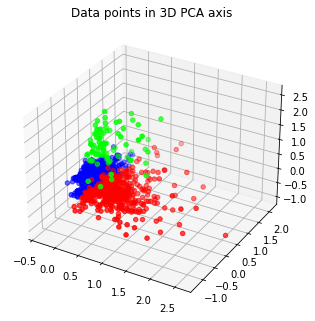

In [ ]:
# plot the figure 
fig = plt.figure()
cmhot = plt.get_cmap('brg')
plt.rcParams['figure.figsize'] = (15, 8)
ax = Axes3D(fig)
ax.scatter(pca_fit[0], pca_fit[2], pca_fit[1],c=y_km,cmap=cmhot)
plt.title('Data points in 3D PCA axis')
plt.show()

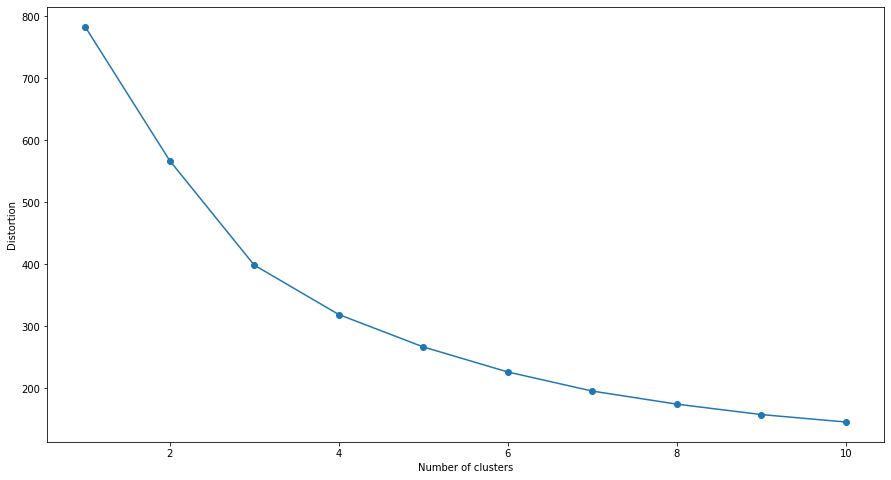

In [ ]:
distortions = []
# check distortion for cluster no. 1 to 10 
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(pca_fit)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# 4 is elbow point hence applying k means algo to n_cluster=4

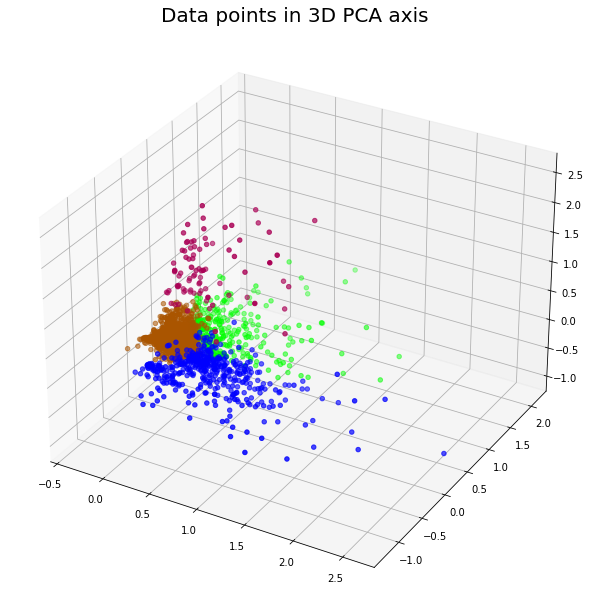

In [ ]:
Kmeans_final = KMeans( n_clusters=4, init='random',
                        n_init=100, max_iter=100, 
                        tol=1e-04, random_state=0).fit(pca_fit)

data['cluster'] = Kmeans_final.labels_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_fit[0], pca_fit[2], pca_fit[1],c=data['cluster'],cmap=cmhot)
plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [ ]:
# Gettings the books for each cluster
cl1_books = data[data.cluster == 0].mean()
cl2_books = data[data.cluster == 1].mean()
cl3_books = data[data.cluster == 2].mean()
cl4_books = data[data.cluster == 3].mean()

In [ ]:
# Getting the users for each cluster
cl1_users = data[data.cluster == 0].index
cl2_users = data[data.cluster == 1].index
cl3_users = data[data.cluster == 2].index
cl4_users = data[data.cluster == 3].index

In [ ]:
def cluster_books_des(Ser):
    bks = pd.DataFrame(Ser).merge(books,left_index=True,right_on='ISBN',how='left')
    bks.rename(columns={0:'avg_score'},inplace=True)
    bks.sort_values(by='avg_score',ascending=False,inplace=True)
    print('\nTop 5 Books\n')
    Top5_books = bks.index[:5]
    for i,isbn in enumerate(Top5_books):
        print(str(i+1)+'.',bks.loc[isbn]['Book-Title'])
        
def cluster_user_des(Ser):
    cl_user = Users[Users['User-ID'].isin(list(Ser))]
    print('Most Common Location:',cl_user['Location'].mode()[0])
    print('Mean Age:',cl_user['Age'].mean())

In [ ]:
# analysing cluster 1
cluster_books_des(cl1_books)
cluster_user_des(cl1_users)


Top 5 Books

1. The Da Vinci Code
2. The Lovely Bones: A Novel
3. The Secret Life of Bees
4. The Red Tent (Bestselling Backlist)
5. Life of Pi
Most Common Location: chicago, illinois, usa
Mean Age: 35.446058091286304


In [ ]:
# analysing cluster 2
cluster_books_des(cl2_books.drop('cluster'))
cluster_user_des(cl2_users)


Top 5 Books

1. Harry Potter and the Order of the Phoenix (Book 5)
2. Harry Potter and the Prisoner of Azkaban (Book 3)
3. Harry Potter and the Chamber of Secrets (Book 2)
4. Harry Potter and the Goblet of Fire (Book 4)
5. Harry Potter and the Sorcerer's Stone (Book 1)
Most Common Location: austin, texas, usa
Mean Age: 30.022988505747126


In [ ]:
# analysing cluster 3
cluster_books_des(cl3_books.drop('cluster'))
cluster_user_des(cl3_users)


Top 5 Books

1. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
2. Wild Animus
3. Fahrenheit 451
4. Life of Pi
5. Interview with the Vampire
Most Common Location: toronto, ontario, canada
Mean Age: 34.3194094346417


In [ ]:
# analysing cluster 4
cluster_books_des(cl4_books.drop('cluster'))
cluster_user_des(cl4_users)


Top 5 Books

1. The Firm
2. A Time to Kill
3. Interview with the Vampire
4. The Lovely Bones: A Novel
5. Jurassic Park
Most Common Location: toronto, ontario, canada
Mean Age: 35.709375


## 
Using DBSCAN

In [ ]:
df=data        # making copy of dataset for using it in another method 

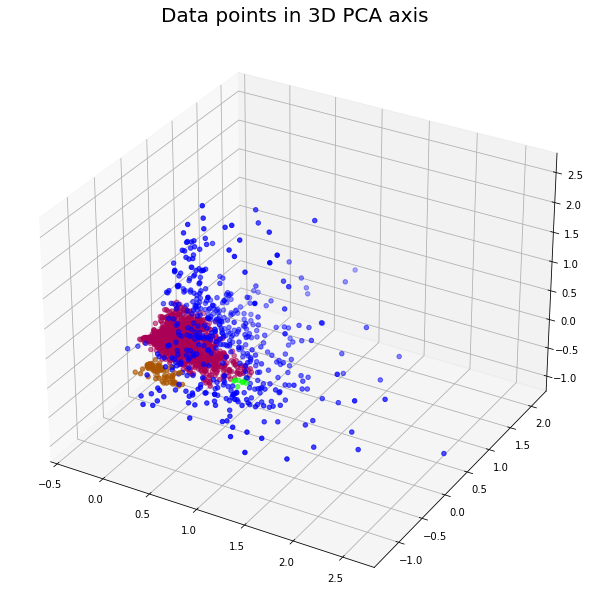

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=10).fit(pca_fit)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_  
df["cluster"]=labels

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_fit[0], pca_fit[2], pca_fit[1],c=labels,cmap=cmhot)
plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [ ]:
# Gettings the books for each cluster
cl1_books = df[df.cluster == 0].mean()
cl2_books = df[df.cluster == 1].mean()
cl3_books = df[df.cluster == -1].mean()
# cl4_books = df[df.cluster == 3].mean()
# Getting the users for each cluster
cl1_users = df[df.cluster == 0].index
cl2_users = df[df.cluster == 1].index
cl3_users = df[df.cluster == -1].index
# cl4_users = df[df.cluster == 3].index

In [ ]:
# analysing cluster 1
cluster_books_des(cl1_books)
cluster_user_des(cl1_users)


Top 5 Books

1. The Lovely Bones: A Novel
2. The Red Tent (Bestselling Backlist)
3. Life of Pi
4. The Secret Life of Bees
5. Girl with a Pearl Earring
Most Common Location: toronto, ontario, canada
Mean Age: 34.616741500962156


In [ ]:
# analysing cluster 2
cluster_books_des(cl2_books.drop('cluster'))
cluster_user_des(cl2_users)


Top 5 Books

1. The Da Vinci Code
2. Angels &amp; Demons
3. The Time Traveler's Wife (Harvest Book)
4. Timeline
5. Digital Fortress : A Thriller
Most Common Location: portland, oregon, usa
Mean Age: 36.9


In [ ]:
# analysing cluster 3
cluster_books_des(cl3_books.drop('cluster'))
cluster_user_des(cl3_users)


Top 5 Books

1. The Da Vinci Code
2. The Lovely Bones: A Novel
3. Harry Potter and the Order of the Phoenix (Book 5)
4. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
5. Harry Potter and the Prisoner of Azkaban (Book 3)
Most Common Location: chicago, illinois, usa
Mean Age: 33.255319148936174
